In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

### What day are people the happiest

In [3]:
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])



In [4]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [5]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data

,Course Name,Timestamp,Rating,Comment,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,Friday
5,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 01:10:06+00:00,4.5,NaN,Friday
6,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 00:44:54+00:00,4.5,NaN,Friday
7,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 23:42:02+00:00,5.0,NaN,Thursday
8,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 21:58:40+00:00,5.0,NaN,Thursday
9,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 20:13:27+00:00,5.0,NaN,Thursday


In [6]:
weekday_average = data.groupby(['Weekday']).mean()
weekday_average


,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


In [8]:
weekday_average = weekday_average.sort_values('Weekday')
weekday_average # This still won't work because it orders the weekdays alphabetically. We need to order by number 
# of the week

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


In [12]:
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
data.head()

,Course Name,Timestamp,Rating,Comment,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,Friday,5


In [14]:
weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average

,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


In [19]:
weekday_average.index

MultiIndex(levels=[['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], ['0', '1', '2', '3', '4', '5', '6']],
           codes=[[3, 1, 5, 6, 4, 0, 2], [0, 1, 2, 3, 4, 5, 6]],
           names=['Weekday', 'Daynumber'])

TypeError: 'value' must be an instance of str or bytes, not a tuple

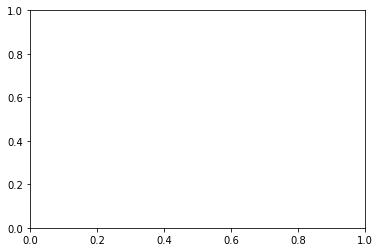

In [20]:
plt.plot(weekday_average.index, weekday_average['Rating']) # will give error because there are 2 indexes (weekday
# and daynumber)

In [21]:
weekday_average.index.get_level_values(0)


Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')

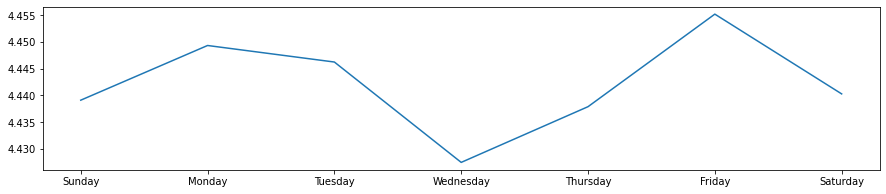

In [24]:
plt.figure(figsize=[15,3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating']) # now index is only day of the week.